In [5]:
x , y = [] ,[]
with open('./food_truck.txt') as A:
    for eachline in A:
        s = eachline.split(',')
        x.append(float(s[0]))
        y.append(float(s[1]))  
for i in range(5):
    print(x[i],y[i])

6.1101 17.592
5.5277 9.1302
8.5186 13.662
7.0032 11.854
5.8598 6.8233


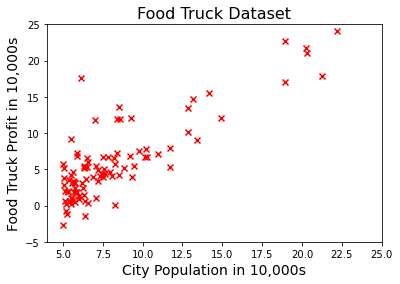

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()   
ax.scatter(x, y, marker="x", c="red")
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)
plt.axis([4, 25, -5, 25])
plt.show()

In [8]:
import numpy as np

data = np.loadtxt('food_truck.txt', delimiter=",") # data是m*2矩阵，每一行表示一个样本
train_x = data[:, 0]    # 城市人口，  m*1矩阵 
train_y = data[:, 1]    # 餐车利润，  m*1矩阵

X = np.ones(shape=(len(train_x), 2))
X[:, 1] = train_x 
y = train_y


XT = X.transpose()

XTy = XT @ y

w = np.linalg.inv(XT@X) @ XTy
print(w)

[-3.89578088  1.19303364]


In [9]:
def gradient_descent(x,y,w,b,alpha=0.01, iterations = 100,epsilon = 1e-9):    
    history=[]
    for i in range(iterations):
        dw = np.mean((w*x+b-y)*x)
        db = np.mean((w*x+b-y))       
        if abs(dw) < epsilon and abs(db) < epsilon:
           break;
     
        #更新w: w = w - alpha * gradient
        w -= alpha*dw 
        b -= alpha*db 
        history.append([w,b])  
       
    return history

In [11]:
X = train_x
w,b = 0.,0.
dw = np.mean((w*X+b-y)*X)
db = np.mean((w*X+b-y))
print(dw)
print(db)

-65.32884974555671
-5.839135051546393


In [12]:
alpha = 0.02
iterations=1000
history = gradient_descent(X,y,w,b,alpha,iterations)
print(len(history))
print(history[-1])

1000
[1.1822480052540145, -3.7884192615511796]


In [13]:
def draw_line(plt,w,b,x,linewidth =2):
    m=len(x)
    f = [0]*m
    for i in range(m): 
       f[i] = b+w*x[i]
    plt.plot(x, f, linewidth) 

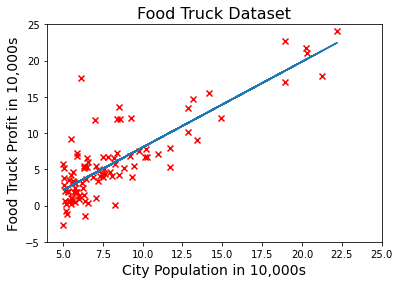

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#fig, ax = plt.subplots()   
plt.scatter(X, y, marker="x", c="red")
plt.title("Food Truck Dataset", fontsize=16)
plt.xlabel("City Population in 10,000s", fontsize=14)
plt.ylabel("Food Truck Profit in 10,000s", fontsize=14)
plt.axis([4, 25, -5, 25])
w,b = history[-1]
draw_line(plt,w,b,X,6)
plt.show()

In [15]:
def loss(x,y,w,b):
    m = len(y)
    return np.mean((x*w+b-y)**2)/2
    cost = 0   
    for i in range(m):  
        f =  x[i]*w+b
        cost += (f-y[i])**2
    cost /=(2*m)
    return cost

print(loss(X,y,1,-3))

4.983860697569072


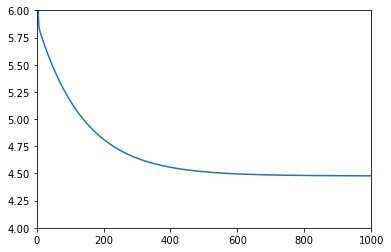

In [16]:
costs = [loss(X,y,w,b) for w,b in history]
plt.axis([0, len(costs), 4, 6])
plt.plot(costs)
plt.show()


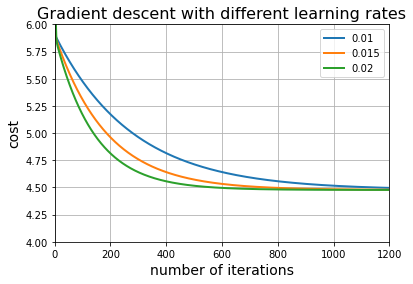

In [20]:
plt.figure()
num_iters = 1200
learning_rates = [0.01, 0.015, 0.02]
for lr in learning_rates:
    w,b=0,0 
    history = gradient_descent(X, y,w, b,lr, num_iters)
    cost_history = [loss(X,y,w,b) for w,b in history]
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
plt.axis([0, num_iters, 4, 6])
plt.grid()
plt.show()

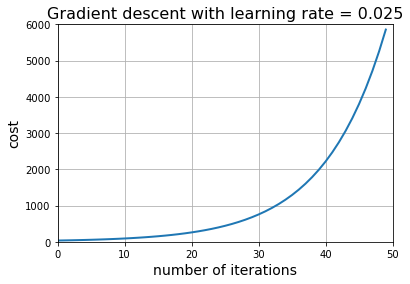

In [21]:
learning_rate = 0.025
num_iters = 50
w,b=0.,0.
history = gradient_descent(X, y,w, b,learning_rate, num_iters)
cost_history = [loss(X,y,w,b) for w,b in history]
plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with learning rate = " + str(learning_rate), fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.axis([0, num_iters, 0, 6000])
plt.grid()
plt.show()

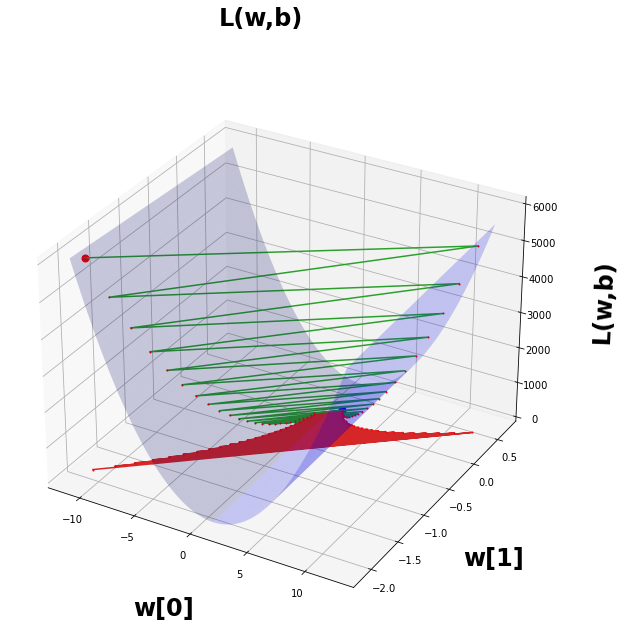

In [22]:
s,bs,z = plot_history(X,y,history)


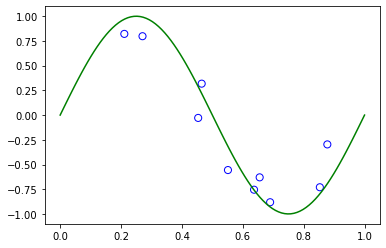

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(896)

def sample(n_samples,std = 0.25):
    x = np.sort(np.random.uniform(0,1,n_samples))
    y = np.sin(2*np.pi*x) + np.random.normal(scale = std, size=x.shape)
    return x,y
    
n_samples = 10
x,y = sample(n_samples)
#x = np.sort(np.random.uniform(0,1,n_samples))
#y = np.sin(2*np.pi*x) + np.random.normal(scale = 0.25, size=x.shape)

x_test =  np.linspace(0, 1, 100)
xx = x_test
y_test = np.sin(2*np.pi*x_test)
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.scatter(x, y,facecolor="none", edgecolor="b", s=50, label="training data")
plt.show()


w=: [-0.19410186]
w=: [ 1.167293   -2.40352288]
w=: [ -0.69160733  14.4684786  -40.54048788  27.82130232]
w=: [   -4850.58139801    82357.68139648  -572250.34375     2099805.375
 -4310128.5         4541128.5         -994779.75       -2845788.25
  2864116.4375      -860148.4375    ]


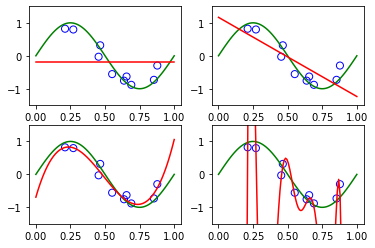

In [25]:
for i, K in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    X = np.array([np.power(x,k) for k in range(K+1)])
    X = X.transpose()
    
    #w,history = gradient_descent_vec(X,y,lr,iterations)
    XT = X.transpose()
    XTy = XT @ y
    w = np.linalg.inv(XT@X) @ XTy
    #w = np.linalg.pinv(X) @ y
    print("w=:",w)
    
    y_predict = 0 #np.zeros(x_test.shape) 
    for i,wi in enumerate(w):
        y_predict+=wi*np.power(x_test,i) 
        
    
    plt.scatter(x, y,facecolor="none", edgecolor="b", s=50, label="training data")
    
    
    y_test = np.sin(2*np.pi*x_test)
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y_predict, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)

plt.show()

w=: [-6.03748469e-02  1.68918336e+01 -2.40282791e+02  2.07239002e+03
 -9.57345772e+03  2.50977081e+04 -3.92730265e+04  3.65062225e+04
 -1.86196455e+04  4.01347821e+03]


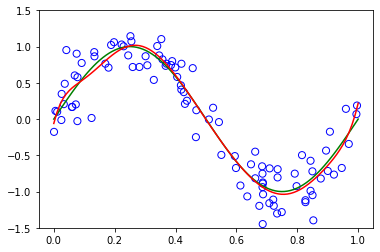

In [26]:
n_samples = 100
x,y = sample(n_samples)
#x = np.sort(np.random.uniform(0,1,n_samples))
#y = np.sin(2*np.pi*x) + np.random.normal(scale = 0.25, size=x.shape)

K= 9

X = np.array([np.power(x,k) for k in range(K+1)])
X = X.transpose()

#w,history = gradient_descent_vec(X,y,lr,iterations)
XT = X.transpose()
XTy = XT @ y
w = np.linalg.inv(XT@X) @ XTy
#w = np.linalg.pinv(X) @ y
print("w=:",w)

y_predict = 0 #np.zeros(x_test.shape) 
for i,wi in enumerate(w):
    y_predict+=wi*np.power(x_test,i) 


plt.scatter(x, y,facecolor="none", edgecolor="b", s=50, label="training data")


y_test = np.sin(2*np.pi*x_test)
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y_predict, c="r", label="fitting")
plt.ylim(-1.5, 1.5)

plt.show()

3.3.2 验证集、测试集

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_pts = 10
x_train,y_train =  sample(n_pts)
x_valid,y_valid =  sample(n_pts) 
x_test,y_test =  sample(n_pts) 

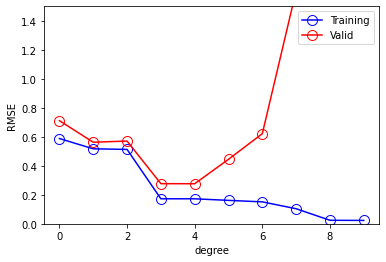

In [28]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

M = 10
errors_train, errors_valid  = [],[]
for K in range(M):  
    X = np.array([np.power(x_train,k) for k in range(K+1)])
    X = X.transpose()    
   
    XT = X.transpose()
    XTy = XT @ y_train
    w = np.linalg.inv(XT@X) @ XTy
 
    predict_train = X@w   
    error_train = rmse(y_train,predict_train)
    
    X_valid = np.array([np.power(x_valid,k) for k in range(K+1)])
    X_valid = X_valid.transpose()
    predict_valid =  X_valid@w
    error_valid = rmse(y_valid,predict_valid)
    
    errors_train.append(error_train)
    errors_valid.append(error_valid)

plt.plot(errors_train, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(errors_valid, 'o-', mfc="none", mec="r", ms=10, c="r", label="Valid")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.ylim(0, 1.5)
plt.show()

In [29]:
def loss(w,X,y):
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #添加一列特征1    
    predictions = X @ w
    errors = predictions - y
    return (errors**2).mean()/2

def learning_curves_trainSize(X_train, y_train, X_val, y_val,alpha=0.3,iterations = 1000):
    train_err = np.zeros(len(y_train))
    valid_err = np.zeros(len(y_train))
    for i in range(len(y_train)):
        w_history = linear_regression_vec(X_train[0:i + 1, :], y_train[0:i + 1],alpha,iterations)
        w = w_history[-1]
        train_err[i] = loss(w, X_train[0:i + 1, :], y_train[0:i + 1])
        valid_err[i] = loss(w, X_val, y_val)
        
    plt.plot(range(1, len(y_train) + 1), train_err, c="r", linewidth=2)
    plt.plot(range(1, len(y_train) + 1), valid_err, c="b", linewidth=2)
    plt.xlabel("number of training examples", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")
    
    max_err = np.max( np.array([np.max(train_err),np.max(valid_err)]))
    min_err = np.min( np.array([np.min(train_err),np.min(valid_err)]))
    offset = (max_err-min_err)/10    
    plt.axis([1, len(y_train)+1, min_err-offset, max_err+offset])
    #plt.axis([1, len(y_train)+1, 0, 100])
    plt.grid()

In [31]:
def gradient_descent_reg(X, y, reg, alpha, num_iters,gamma = 0.8,epsilon=1e-8):
    w_history = []          # 记录迭代过程中的参数
    X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype),X))  #添加一列特征1    
    num_features = X.shape[1] 
    v= np.zeros_like(num_features)
    w = np.zeros(num_features)
    for n in range(num_iters):
        predictions = X @ w                 #求假设函数的预测值，即f(x)
        errors = predictions - y                # 预测值和真实值的误差
        gradient = X.transpose() @ errors /len(y)        #计算梯度
        gradient += 2*reg*w
        if np.max(np.abs(gradient))<epsilon:
            print("gradient is small enough!")
            print("iterated num is :",n)
            break
        #w -= alpha * gradient        #更新模型的参数
        v = gamma*v+alpha* gradient
        w= w-v
        
        w_history.append(w)       
    return w_history                  # return optimized parameters and cost history

In [32]:
def loss_reg(w,X,y,reg = 0.):
    errors = X@w[1:]+w[0]-y
    reg_error = reg*np.sum(np.square(w))
    return (errors**2).mean()/2+reg_error   

def compute_loss_history_reg(X,y,w_history,reg = 0.):
    loss_history = []
    for w in w_history: 
        loss_history.append(loss_reg(w,X,y,reg))
    return loss_history